In [3]:
#import libraries 
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
import tensorflow as tf

# 여기 중요 gpu 메모리 관리

In [10]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = tf.compat.v1.Session(config=config)


In [11]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())




[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9852358444758035063
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1974743860
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8550570340686757422
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [12]:
from keras import backend as K

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is available


In [13]:
import tensorflow as tf 
config = tf.compat.v1.ConfigProto() 
config.gpu_options.allow_growth = True 
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))




Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1



In [14]:
# train_data => test_data 는 리뷰의 목록
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [15]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [16]:
train_data.shape

(25000,)

In [17]:
test_data.shape

(25000,)

In [18]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
train_labels.shape

(25000,)

## 2. 데이터 처리

In [20]:
# 같은 길이가 되도록 리스트에 패딩 추가 
import numpy as np
import pandas as pd 


In [21]:
def vectorize_sequence(seq,dimension=10000):
    #
    result = np.zeros((len(seq), dimension))
    
    for i, s in enumerate(seq):
        result[i, s] = 1
        
    return result

In [22]:
# 훈련 데이터 벡터화 
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

# 레이블 벡터화
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3. 신경망 모델 만들기

### => 1 . Dense 층을 쌓을 때 고려할 것은 2가지이다.
층의수: 얼마나 많은 층을 사용할 것인가 \
유닛 수: 각 층에서 얼마나 많은 유닛을 둘 것인가.

### => 2. 신경망 모델 만들기 
활성화 함수가 필요한 이유 \

활성화 함수가 없다면 신경망 층은 (선형 연산인) 점곱과 덧셈 2개로 구성된다.\
선형연산의 결과를 다시 다음층의 입력값으로 주게 되면, 그 다음층의 결과값도\
선형 연산이 되어 층을 여러개로 구성하는 의미가 없어진다.\
그래서 은닉층의 결과를 풍부하게 만들기 위해서는 활성화 함수가 필요\

중간 은닉층: 활성화 함수 relu를 사용\
마지막층: 확률을 출력하기 위해서 sigmoid 함수 사용(1에 가까우면 긍정)

In [23]:
from keras import models 
from keras import layers

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 3. 모델 컴파일 
마지막으로 손실 함수(오차를 구하는 함수)와 옵티마이저를 선택한다.\
여기서는 binary_crossentropy 손실이 적합하다. 확률을 출력하는 모델을 사용할 떄는 \
크로스엔트로피가 최선의 선택.


In [25]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### 훈련 검증하기
너무 많은 훈련으로 특정(훈련) 데이터에 과적합(오버피팅)되는것을 막기 위해 검증과정을 거친다

In [26]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [27]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

### 1. 검증 데이터 만들기

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 2. 모델훈련

512개의 샘플 = 1개의 미니배치\
20개의 에포크(횟수)만큼 훈련시킨다.
동시에 따로 떼어놓은 1만개의 샘플에서 손실, 정확도를 측정해야 하므로, 
validation_data 매개변수에 위에서 만든 검증 데이터를 전달한다

In [29]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=256,
                   validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 4s 51ms/step - loss: 0.4451 - accuracy: 0.8209 - val_loss: 0.3131 - val_accuracy: 0.8838
Epoch 2/20
59/59 [==============================] - 1s 17ms/step - loss: 0.2390 - accuracy: 0.9167 - val_loss: 0.2935 - val_accuracy: 0.8806
Epoch 3/20
59/59 [==============================] - 1s 17ms/step - loss: 0.1729 - accuracy: 0.9403 - val_loss: 0.2810 - val_accuracy: 0.8891
Epoch 4/20
59/59 [==============================] - 1s 18ms/step - loss: 0.1316 - accuracy: 0.9556 - val_loss: 0.3353 - val_accuracy: 0.8787
Epoch 5/20
59/59 [==============================] - 1s 17ms/step - loss: 0.1027 - accuracy: 0.9663 - val_loss: 0.3398 - val_accuracy: 0.8744
Epoch 6/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0786 - accuracy: 0.9749 - val_loss: 0.3637 - val_accuracy: 0.8802
Epoch 7/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.4047 - val_accuracy: 0.8730
Epoch 8/20
59

## 3. 훈련 과정의 히스토리를 변수에 저장한다.

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 4. 그래프
훈련과 검증의 손실 그리기

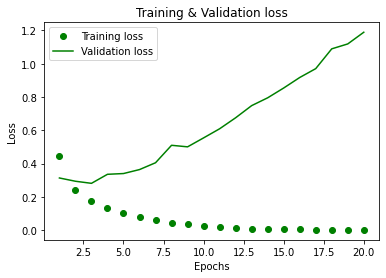

In [31]:
import matplotlib.pyplot as plt 
%matplotlib inline

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 훈련, 검증 정확도 그리기

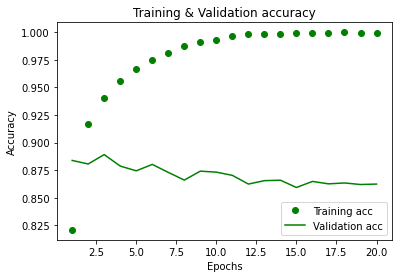

In [32]:
plt.clf() # 그래프 초기화 하기 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Overfitting(과적합) 
너무 많은 학습을 시켜서 훈련 데이터에 편향된 판단을 하게 하는 오류이다. \
아래 그래프를 보면 훈련 데이터는 갈수록 손실(오차)이 줄어들고, 정확도는 높아지지만 
검증데이터는 반대이다. 그래프를 통해 확인했다.\
훈련 데이터의 레이블에 편향된 판단을 해서 새로운 데이터를 일반화 하여 판단하지 못하는 것이다.\
위에서 보면 손실이 4번 에포크 정도에서 역전되고 있으므로 4번까지만 진행된다.

### 재훈련

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.4762 - accuracy: 0.8058
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2724 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2079 - accuracy: 0.9277
Epoch 4/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1749 - accuracy: 0.9398


In [37]:
result = model.evaluate(x_test, y_test)

print(result)

ValueError: Calling `Model.evaluate` in graph mode is not supported when the `Model` instance was constructed with eager mode enabled. Please construct your `Model` instance in graph mode or call `Model.evaluate` with eager mode enabled.

### 에포크를 너무 많이 주면, 훈련데이터에 오버피팅 되어서 테스트 데이터의
예측률이 떨어진다.

### 오버피팅 확인: 훈련데이터셋의 일부를 떼어내서 검증 데이터로 활용하고, 손실과 정확도 측면에서 훈련 데이터와 검증 데이터의 history를 비교하여 오버피팅 여부를 확인한다. 만약 epoch 가 거듭될수록 훈련 데이터의 손실은 하락, 정확도는 높아진 반면 검증 데이터의 손실은 상승, 정확도는 낮아졌다면 오버피팅 된 것이다.

### epochs 조절: 오버피팅 되었다면 epochs 를 낮추면서 훈련 데이터의 학습에 편향되지 않도록 한다.